In [14]:
import os
import sys
import time
import shutil
import logging
import argparse
import yaml
import traceback

import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
pwd

'/atlas/u/kechoi/multi-fairgen'

In [17]:
cd ../

/atlas/u/kechoi


# Ratios (perc=1.0)

In [9]:
perc = 1.0

data = np.load('classification/results/mnist_subset_z_perc{}/val_ratios.npz'.format(perc))
ratios = data['ratios']
new_ratios = data['ratios'][ratios != np.inf]
y = data['d_labels'][ratios != np.inf]

if len(ratios) != len(y):
    print('a few ratios were thrown out bc of infs')

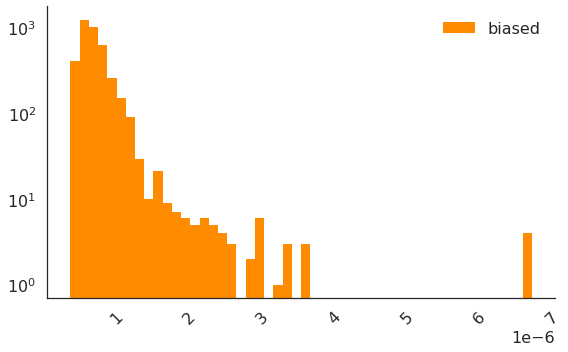

In [10]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==0], bins=50, log=True ,label='biased', color='darkorange')
# _ = plt.hist(new_ratios[y==1], bins=50, log=True, label='ref', alpha=0.5)
plt.xticks(rotation=45)

plt.legend()
sns.despine()
plt.tight_layout()

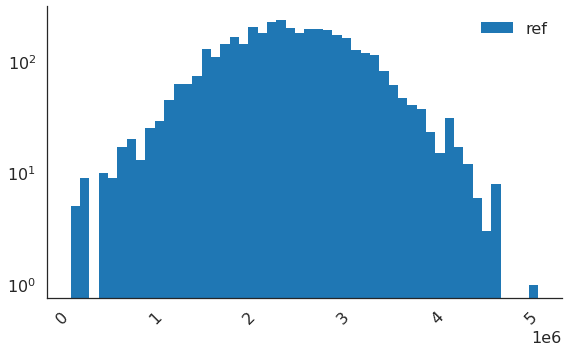

In [11]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==1], bins=50, log=True, label='ref')
plt.xticks(rotation=45)

plt.legend()
sns.despine()
plt.tight_layout()

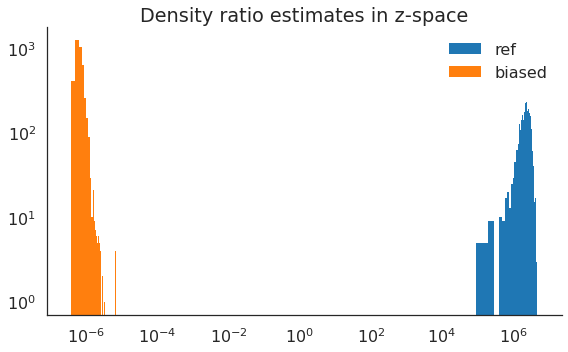

In [20]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(new_ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(new_ratios[y==0]), bins=50, label='biased')
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

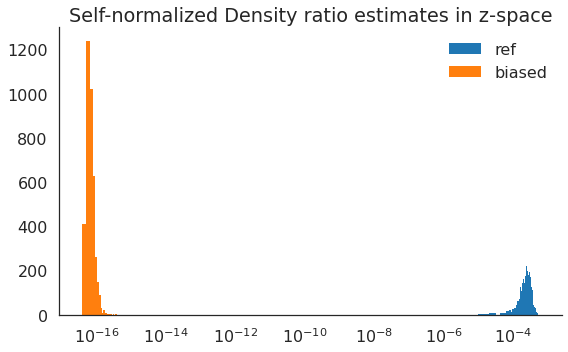

In [15]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(new_ratios[y==1])/new_ratios.sum(), bins=50, label='ref')
_ = plt.hist(sorted(new_ratios[y==0])/new_ratios.sum(), bins=50, label='biased')
plt.xscale('log')
# plt.yscale('log')

plt.title('Self-normalized Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

0.051575016 0.09234931
9.815926 21.934351


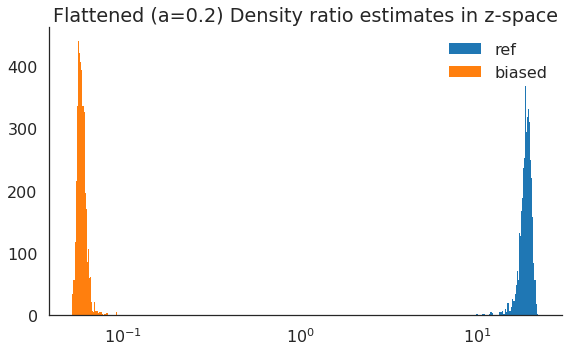

In [19]:
alpha = 0.2

plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1]**alpha, bins=50, label='ref')
_ = plt.hist(new_ratios[y==0]**alpha, bins=50, label='biased')
plt.xscale('log')
# plt.yscale('log')

plt.title('Flattened (a={}) Density ratio estimates in z-space'.format(alpha))
plt.legend()
sns.despine()
plt.tight_layout()

print(np.min(new_ratios[y==0]**alpha), np.max(new_ratios[y==0]**alpha))
print(np.min(new_ratios[y==1]**alpha), np.max(new_ratios[y==1]**alpha))

# Ratios (perc=0.1)

In [19]:
cd multi-fairgen/

/atlas/u/kechoi/multi-fairgen


In [20]:
perc = 0.1

data = np.load('src/classification/results/mnist_subset_z_perc{}/val_ratios.npz'.format(perc))
ratios = data['ratios']
new_ratios = data['ratios'][ratios != np.inf]
y = data['d_labels'][ratios != np.inf]

if len(ratios) != len(y):
    print('a few ratios were thrown out bc of infs')

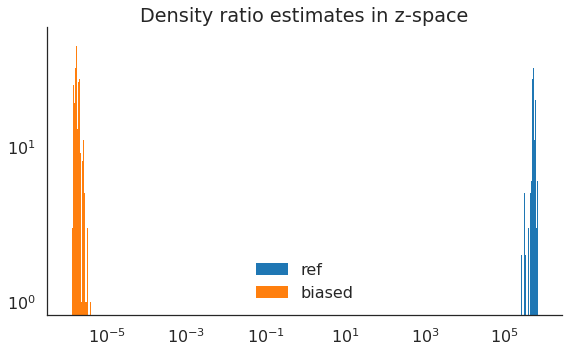

In [21]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(new_ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(new_ratios[y==0]), bins=50, label='biased')
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

0.41293094 0.445208
2.2500498 2.4004512


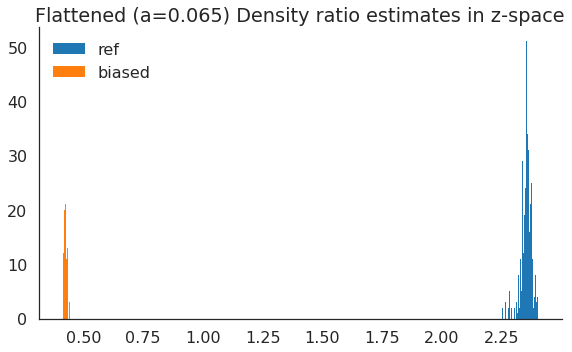

In [23]:
alpha = 0.065

plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1]**alpha, bins=50, label='ref')
_ = plt.hist(new_ratios[y==0]**alpha, bins=50, label='biased')
# plt.xscale('log')
# plt.yscale('log')

plt.title('Flattened (a={}) Density ratio estimates in z-space'.format(alpha))
plt.legend()
sns.despine()
plt.tight_layout()

print(np.min(new_ratios[y==0]**alpha), np.max(new_ratios[y==0]**alpha))
print(np.min(new_ratios[y==1]**alpha), np.max(new_ratios[y==1]**alpha))

# perc = 0.25

In [24]:
perc = 0.25

data = np.load('classification/results/mnist_subset_z_perc{}/val_ratios.npz'.format(perc))
ratios = data['ratios']
new_ratios = data['ratios'][ratios != np.inf]
y = data['d_labels'][ratios != np.inf]

if len(ratios) != len(y):
    print('a few ratios were thrown out bc of infs')

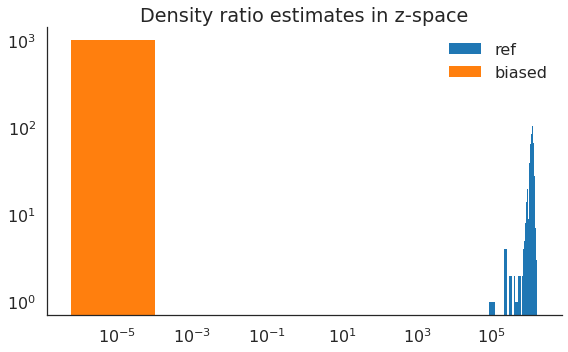

In [25]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(new_ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(new_ratios[y==0]), bins=50, label='biased')
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

0.0562293 0.34536907
9.713602 17.715685


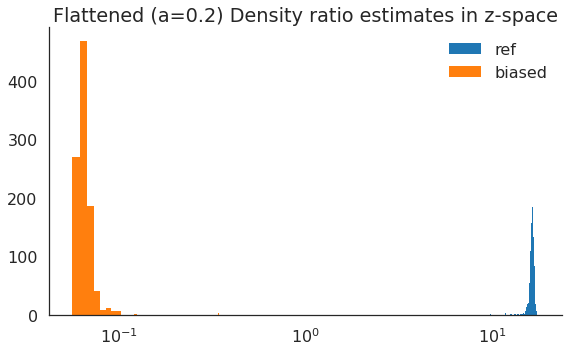

In [26]:
alpha = 0.2

plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1]**alpha, bins=50, label='ref')
_ = plt.hist(new_ratios[y==0]**alpha, bins=50, label='biased')
plt.xscale('log')
# plt.yscale('log')

plt.title('Flattened (a={}) Density ratio estimates in z-space'.format(alpha))
plt.legend()
sns.despine()
plt.tight_layout()

print(np.min(new_ratios[y==0]**alpha), np.max(new_ratios[y==0]**alpha))
print(np.min(new_ratios[y==1]**alpha), np.max(new_ratios[y==1]**alpha))

# perc = 0.5

In [30]:
perc = 0.5

data = np.load('classification/results/mnist_subset_z_perc{}/val_ratios.npz'.format(perc))
ratios = data['ratios']
new_ratios = data['ratios'][ratios != np.inf]
y = data['d_labels'][ratios != np.inf]

if len(ratios) != len(y):
    print('a few ratios were thrown out bc of infs')

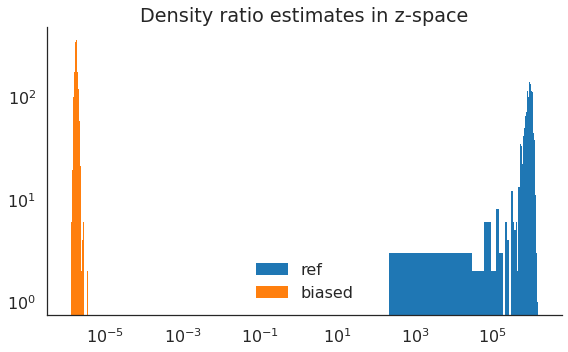

In [31]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(new_ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(new_ratios[y==0]), bins=50, label='biased')
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

0.066406146 0.08604886
2.9256594 17.147263


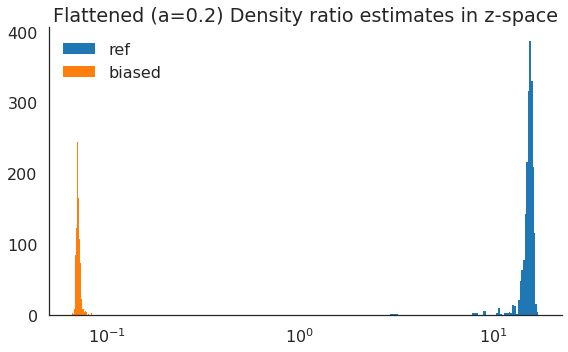

In [32]:
alpha = 0.2

plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1]**alpha, bins=50, label='ref')
_ = plt.hist(new_ratios[y==0]**alpha, bins=50, label='biased')
plt.xscale('log')
# plt.yscale('log')

plt.title('Flattened (a={}) Density ratio estimates in z-space'.format(alpha))
plt.legend()
sns.despine()
plt.tight_layout()

print(np.min(new_ratios[y==0]**alpha), np.max(new_ratios[y==0]**alpha))
print(np.min(new_ratios[y==1]**alpha), np.max(new_ratios[y==1]**alpha))

In [33]:
ll /atlas/u/kechoi/multi-fairgen/results/subset_maf_perc0.1/

total 0


In [39]:
import torch
label = torch.ones(1) * 7
label

tensor([7.])

In [40]:
label = (label == 7).float()
print(label)

tensor([1.])


----

In [9]:
import torch
from torch.distributions import Normal

In [10]:
Normal(0, 1).sample((1000,784)).size()

torch.Size([1000, 784])

In [11]:
ratios = torch.randn(1000)
ratios.size()

torch.Size([1000])

In [12]:
Normal(0, torch.ones(784)).sample().size()

torch.Size([784])

In [ ]:
torch.randn(1000,)